In [1]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di casi per continente
# Filtriamo righe valide e raggruppiamo per continente
continent_cases = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

print("\nNumero totale di casi per continente:")
print(continent_cases)

# 1b. Calcoliamo il numero totale di casi mondiali
world_cases = df['new_cases'].sum()

# Calcoliamo la percentuale per ogni continente
percent_cases = (continent_cases / world_cases) * 100

print("\nPercentuale di casi per continente rispetto al totale mondiale:")
print(percent_cases)

# Creiamo un report finale in un file CSV
report = pd.DataFrame({
    'Total Cases': continent_cases,
    'Percentage of World Cases': percent_cases
})
report.to_csv('continent_cases_report.csv', index=True)
print("\nReport salvato come 'continent_cases_report.csv'")


Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di casi per continente
# Filtriamo righe valide e raggruppiamo per continente
continent_cases = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

print("\nNumero totale di casi per continente:")
print(continent_cases)

# 1b. Calcoliamo il numero totale di casi mondiali
world_cases = df['new_cases'].sum()

# Calcoliamo la percentuale per ogni continente
percent_cases = (continent_cases / world_cases) * 100

print("\nPercentuale di casi per continente rispetto al totale mondiale:")
print(percent_cases)

# Creiamo un report finale in un file CSV
report = pd.DataFrame({
    'Total Cases': continent_cases,
    'Percentage of World Cases': percent_cases
})
report.to_csv('continent_cases_report.csv', index=True)
print("\nReport salvato come 'continent_cases_report.csv'")


# In[ ]:





# In[2]:


# Rimuoviamo valori nulli e sostituiamo new_cases mancanti con 0
df['new_cases'] = df['new_cases'].fillna(0)

# Calcoliamo il totale mondiale dei nuovi casi
world_cases = df['new_cases'].sum()

# Filtriamo righe valide (continente non nullo) e raggruppiamo per continente
continent_cases = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Calcoliamo la percentuale rispetto al totale mondiale
percent_cases = (continent_cases / world_cases) * 100

# Verifichiamo la somma delle percentuali
total_percentage = percent_cases.sum()

print("\nNumero totale di casi per continente:")
print(continent_cases)

print("\nPercentuale di casi per continente rispetto al totale mondiale:")
print(percent_cases)

print(f"\nLa somma delle percentuali è: {total_percentage:.2f}%")


# In[3]:


# Calcolo del totale della popolazione per continente
# Filtriamo i dati validi per continente
continent_population = df[df['continent'].notnull()].groupby('continent')['population'].max()

print("\nTotale della popolazione per continente:")
print(continent_population)

# Calcolo del rapporto positivi totali sulla popolazione per continente
# Positivi totali (numero totale di casi confermati)
positives_by_continent = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Rapporto positivi totali su popolazione
positives_ratio = (positives_by_continent / continent_population) * 100

print("\nRapporto di positivi totali sulla popolazione per continente (in %):")
print(positives_ratio)

# Stampa i totali della popolazione per continenti
print("\nPopolazione totale per continente:")
print(continent_population)

# Creazione di un report combinato
report = pd.DataFrame({
    'Total Cases': positives_by_continent,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})
print("\nReport finale:")
print(report)

# Salvataggio del report come CSV
report.to_csv('continent_population_report.csv', index=True)
print("\nReport salvato come 'continent_population_report.csv'")


# In[4]:


# Troviamo la popolazione totale per continente prendendo il valore massimo per ciascun paese
continent_population = df[df['continent'].notnull()]     .groupby(['continent', 'location'])['population'].max()     .groupby('continent').sum()

# Calcoliamo il totale dei positivi per continente
positives_by_continent = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Calcoliamo il rapporto positivi/popolazione
positives_ratio = (positives_by_continent / continent_population) * 100

# Creiamo il report finale
report = pd.DataFrame({
    'Total Cases': positives_by_continent,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})

print("\nReport finale:")
print(report)

# Salviamo il report in un file CSV
report.to_csv('continent_population_report_fixed.csv', index=True)
print("\nReport salvato come 'continent_population_report_fixed.csv'")


# In[5]:


import pandas as pd

# Carica il file JSON
df = pd.read_json('path_to_your_file.json')

# Controlliamo la struttura dei dati
print(df.head())
print(df.columns)

# Se la struttura del JSON è complessa (dati annidati), possiamo "appiattirla"
# df = pd.json_normalize(df)

# Passaggio 1: Creiamo una colonna 'year_month' per raggruppare i dati per mese e anno
df['year_month'] = df['date'].apply(lambda x: x[:7])  # Assuming date is in 'YYYY-MM-DD' format

# Passaggio 2: Raggruppiamo i dati per continente, anno/mese e sommiamo i casi nuovi
continent_cases_monthly = df.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()

# Passaggio 3: Sommiamo i casi per continente
continent_cases_total = continent_cases_monthly.groupby('continent')['new_cases'].sum()

# Passaggio 4: Popolazione per continente (assumendo che la popolazione sia corretta)
continent_population = df[df['continent'].notnull()]     .groupby('continent')['population'].max()

# Passaggio 5: Calcolare il rapporto dei casi sulla popolazione
positives_ratio = (continent_cases_total / continent_population) * 100

# Passaggio 6: Creiamo il report finale
report = pd.DataFrame({
    'Total Cases': continent_cases_total,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})

# Stampa del report finale
print("\nReport finale:")
print(report)

# Salviamo il report in un file CSV
report.to_csv('continent_population_report_from_json.csv', index=True)
print("\nReport corretto salvato come 'continent_population_report_from_json.csv'")


# In[6]:


import pandas as pd
import requests

# URL del file JSON
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.json"

# Scarica il file JSON dal URL
response = requests.get(url)

# Verifica se il download è andato a buon fine
if response.status_code == 200:
    print("Download riuscito!")
    # Carica i dati JSON in un DataFrame pandas
    df = pd.read_json(response.text)

    # Controlliamo la struttura dei dati
    print(df.head())
    print(df.columns)
    
    # Passaggio 1: Creiamo una colonna 'year_month' per raggruppare i dati per mese e anno
    df['year_month'] = df['date'].apply(lambda x: x[:7])  # Assuming date is in 'YYYY-MM-DD' format

    # Passaggio 2: Raggruppiamo i dati per continente, anno/mese e sommiamo i casi nuovi
    continent_cases_monthly = df.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()

    # Passaggio 3: Sommiamo i casi per continente
    continent_cases_total = continent_cases_monthly.groupby('continent')['new_cases'].sum()

    # Passaggio 4: Popolazione per continente (assumendo che la popolazione sia corretta)
    continent_population = df[df['continent'].notnull()]         .groupby('continent')['population'].max()

    # Passaggio 5: Calcolare il rapporto dei casi sulla popolazione
    positives_ratio = (continent_cases_total / continent_population) * 100

    # Passaggio 6: Creiamo il report finale
    report = pd.DataFrame({
        'Total Cases': continent_cases_total,
        'Total Population': continent_population,
        'Positives Ratio (%)': positives_ratio
    })

    # Stampa del report finale
    print("\nReport finale:")
    print(report)

    # Salviamo il report in un file CSV
    report.to_csv('continent_population_report_from_json.csv', index=True)
    print("\nReport corretto salvato come 'continent_population_report_from_json.csv'")

else:
    print(f"Errore nel download del file. Status code: {response.status_code}")


# In[7]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Mostriamo le prime righe per confermare che il file è stato caricato correttamente
print(df.head())

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Raggruppa per continente e anno e somma la popolazione
continent_population_yearly = df.groupby(['continent', 'year'])['population'].max().reset_index()

# Somma totale della popolazione per continente
continent_population_total = continent_population_yearly.groupby('continent')['population'].sum()

# Somma globale della popolazione
total_population = continent_population_total.sum()

# Mostriamo il risultato
print("\nPopolazione totale per anno e continente:")
print(continent_population_yearly)

print("\nPopolazione totale per continente:")
print(continent_population_total)

print("\nPopolazione totale globale:")
print(total_population)


# In[8]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Mostriamo le prime righe per confermare che il file è stato caricato correttamente
print(df.head())

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Raggruppa per continente e anno e somma la popolazione
continent_population_yearly = df.groupby(['continent', 'year'])['population'].sum().reset_index()

# Mostriamo il risultato: popolazione totale per continente e anno
print("\nTotale popolazione per continente e anno:")
print(continent_population_yearly)


# In[9]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Rimuovi eventuali duplicati considerando solo la combinazione di 'continent' e 'year' 
df_unique = df.drop_duplicates(subset=['continent', 'year'])

# Raggruppa per continente e anno e somma i casi totali
continent_cases_yearly = df_unique.groupby(['continent', 'year'])['total_cases'].sum().reset_index()

# Mostriamo il risultato: totale dei casi per continente e anno
print("\nTotale casi per continente e anno:")
print(continent_cases_yearly)


# In[ ]:





# In[10]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra il dataset per includere solo i dati relativi a 'OWID_EUR' (Europa)
df_europe = df[df['continent'] == 'Europe']

# Raggruppa i dati per anno e somma i nuovi casi
total_new_cases_per_year = df_europe.groupby('year')['new_cases'].sum().reset_index()

# Mostriamo il risultato
print("\nSomma del totale dei nuovi casi per anno (identificatore 'OWID_EUR'):")
print(total_new_cases_per_year)


# In[11]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra il dataset per includere solo i dati relativi al continente 'Europe'
df_europe = df[df['continent'] == 'Europe']

# Raggruppa i dati per anno e somma i nuovi casi
total_new_cases_per_year_europe = df_europe.groupby('year')['new_cases'].sum().reset_index()

# Mostriamo il risultato
print("\nSomma del totale dei nuovi casi per anno (identificatore 'Europe'):")
print(total_new_cases_per_year_europe)


# In[ ]:





# In[12]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Lista dei continenti OWID
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Dati per ogni continente
result = []

# Itera per ogni continente
for continent in continents:
    # Filtra il dataset per il continente corrente
    df_continent = df[df['continent'] == continent]
    
    # Raggruppa i dati per anno e somma i nuovi casi e la popolazione
    grouped_data = df_continent.groupby('year').agg(
        total_new_cases=('new_cases', 'sum'),
        total_population=('population', 'max')  # Supponiamo che la popolazione per il continente non cambi durante l'anno
    ).reset_index()
    
    # Calcola il rapporto tra nuovi casi e popolazione
    grouped_data['cases_ratio'] = (grouped_data['total_new_cases'] / grouped_data['total_population']) * 100
    
    # Aggiungi il continente come colonna
    grouped_data['continent'] = continent
    
    # Aggiungi i risultati alla lista
    result.append(grouped_data)

# Combina tutti i risultati in un DataFrame finale
final_result = pd.concat(result)

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(final_result[['continent', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[13]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra i dati per i continenti che hanno codici ISO che iniziano con 'OWID'
continents = df[df['iso_code'].str.startswith('OWID')]

# Raggruppa i dati per continente e anno e somma i nuovi casi
grouped = continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Prendi solo il primo valore di popolazione per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[ ]:





# In[14]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[15]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[16]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Formatta i numeri con separatore delle migliaia (virgola)
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}")
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}")
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.2f}")

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[17]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.2f}".replace(',', '.'))

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[18]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno senza moltiplicare per 100
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])


# In[19]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno senza moltiplicare per 100
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Verifica la somma del cases ratio per anno
sum_cases_ratio = grouped.groupby('year')['cases_ratio'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del cases ratio per ogni anno:")
print(sum_cases_ratio)


# In[20]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Calcola il totale dei new cases per anno (somma dei nuovi casi su tutti i continenti)
total_new_cases_per_year = grouped.groupby('year')['total_new_cases'].sum().reset_index()
total_new_cases_per_year.rename(columns={'total_new_cases': 'total_new_cases_all_years'}, inplace=True)

# Uniamo il totale dei new cases per anno ai dati raggruppati per continente
grouped = pd.merge(grouped, total_new_cases_per_year, on='year')

# Aggiungiamo una colonna con il rapporto tra il totale dei new cases per anno e continente e il totale dei new cases per anno
grouped['new_cases_ratio_per_year'] = grouped['total_new_cases'] / grouped['total_new_cases_all_years']

# Verifica che la somma della colonna 'new_cases_ratio_per_year' per ogni anno sia pari a 1
sum_new_cases_ratio = grouped.groupby('year')['new_cases_ratio_per_year'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))
grouped['new_cases_ratio_per_year'] = grouped['new_cases_ratio_per_year'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del new_cases_ratio_per_year per ogni anno:")
print(sum_new_cases_ratio)

# Mostriamo il dataframe aggiornato
print("\nDati aggiornati con la colonna new_cases_ratio_per_year:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio', 'new_cases_ratio_per_year']])


# In[21]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Calcola il totale dei new cases per anno (somma dei nuovi casi su tutti i continenti)
total_new_cases_per_year = grouped.groupby('year')['total_new_cases'].sum().reset_index()
total_new_cases_per_year.rename(columns={'total_new_cases': 'total_new_cases_all_years'}, inplace=True)

# Uniamo il totale dei new cases per anno ai dati raggruppati per continente
grouped = pd.merge(grouped, total_new_cases_per_year, on='year')

# Aggiungiamo una colonna con il rapporto tra il totale dei new cases per anno e continente e il totale dei new cases per anno
grouped['new_cases_ratio_per_year'] = grouped['total_new_cases'] / grouped['total_new_cases_all_years']

# Rimuovi le colonne 'total_population' e 'cases_ratio'
grouped.drop(columns=['total_population', 'cases_ratio'], inplace=True)

# Verifica che la somma della colonna 'new_cases_ratio_per_year' per ogni anno sia pari a 1
sum_new_cases_ratio = grouped.groupby('year')['new_cases_ratio_per_year'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['new_cases_ratio_per_year'] = grouped['new_cases_ratio_per_year'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del new_cases_ratio_per_year per ogni anno:")
print(sum_new_cases_ratio)

# Mostriamo il dataframe aggiornato senza le colonne 'total_population' e 'cases_ratio'
print("\nDati aggiornati con la colonna new_cases_ratio_per_year (senza 'total_population' e 'cases_ratio'):")
print(grouped[['iso_code', 'year', 'total_new_cases', 'new_cases_ratio_per_year']])


# In[22]:


import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra i dati per l'Italia
df_italy = df[df['location'] == 'Italy']

# Raggruppa per anno e somma i total cases
grouped_italy = df_italy.groupby('year').agg(
    total_cases=('total_cases', 'max')  # Utilizza max per ottenere il totale accumulato dei casi per anno
).reset_index()

# Visualizza il totale dei casi per anno
print(grouped_italy)

# Crea il grafico dell'evoluzione dei casi totali per anno
plt.figure(figsize=(10, 6))
plt.plot(grouped_italy['year'], grouped_italy['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (per anno)', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)
plt.grid(True)
plt.show()


# In[23]:


import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per l'Italia e per il 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# 1. Grafico dell'evoluzione dei casi totali (total_cases) per l'anno 2022
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (2022)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Grafico del numero di nuovi casi (new_cases) per l'anno 2022, rimuovendo valori 0 e NaN
df_italy_2022_new_cases = df_italy_2022[(df_italy_2022['new_cases'] > 0) & (~df_italy_2022['new_cases'].isna())]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022_new_cases['date'], df_italy_2022_new_cases['new_cases'], marker='o', color='r', linestyle='-', linewidth=2, markersize=5)
plt.title('Nuovi casi di COVID-19 in Italia (2022) (senza valori 0)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi casi', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# In[24]:


import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per l'Italia e per il 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# 1. Grafico dell'evoluzione dei casi totali (total_cases) per l'anno 2022
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (2022)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)

# Annotiamo i punti di picco
max_cases = df_italy_2022['total_cases'].max()
max_case_date = df_italy_2022[df_italy_2022['total_cases'] == max_cases]['date'].iloc[0]
plt.annotate(f'{max_cases:,}', 
             (max_case_date, max_cases),
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center', 
             fontsize=10, 
             color='red', 
             weight='bold')

# Impediamo la notazione scientifica
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Grafico del numero di nuovi casi (new_cases) per l'anno 2022, rimuovendo valori 0 e NaN
df_italy_2022_new_cases = df_italy_2022[(df_italy_2022['new_cases'] > 0) & (~df_italy_2022['new_cases'].isna())]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022_new_cases['date'], df_italy_2022_new_cases['new_cases'], marker='o', color='r', linestyle='-', linewidth=2, markersize=5)
plt.title('Nuovi casi di COVID-19 in Italia (2022) (senza valori 0)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi casi', fontsize=12)

# Annotiamo i punti di picco
max_new_cases = df_italy_2022_new_cases['new_cases'].max()
max_new_case_date = df_italy_2022_new_cases[df_italy_2022_new_cases['new_cases'] == max_new_cases]['date'].iloc[0]
plt.annotate(f'{max_new_cases:,}', 
             (max_new_case_date, max_new_cases),
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center', 
             fontsize=10, 
             color='green', 
             weight='bold')

# Impediamo la notazione scientifica
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# In[25]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania e Francia dal maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
df_filtered = df[(df['location'].isin(countries)) & 
                 (df['date'] >= '2022-05-01') & 
                 (df['date'] <= '2023-04-30')]

# Boxplot per il numero di pazienti in terapia intensiva (ICU) 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='location', y='icu_patients')

# Titoli e etichette
plt.title('Differenza nel numero di pazienti in Terapia Intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)', fontsize=14)
plt.xlabel('Nazione', fontsize=12)
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)', fontsize=12)

# Mostra il grafico
plt.show()


# In[26]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Somma dei pazienti ospedalizzati (hosp_patients) per ogni paese
hospitalized_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Stampa della somma dei pazienti ospedalizzati per nazione
print("Somma dei pazienti ospedalizzati per nazione nel 2023:")
print(hospitalized_sum)

# Controlliamo quanti valori nulli ci sono e se è possibile gestirli
print(f"\nValori nulli nei pazienti ospedalizzati (hosp_patients):\n{null_values[['location', 'date', 'hosp_patients']]}")


# In[27]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Visualizziamo il numero di valori nulli per ciascuna nazione
null_count = null_values['location'].value_counts()

# Stampa dei valori nulli per nazione e delle statistiche
print(f"Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:\n{null_count}")

# Mostriamo alcune righe con valori nulli per esaminare meglio la situazione
print("\nEsempio di righe con valori nulli per 'hosp_patients':")
print(null_values[['location', 'date', 'hosp_patients']].head())


# In[28]:


import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Visualizziamo il numero di valori nulli per ciascuna nazione
null_count = null_values['location'].value_counts()

# Numero totale di righe per ciascuna nazione
total_count = df_filtered_2023['location'].value_counts()

# Calcolare la percentuale di valori nulli rispetto al numero totale di righe
null_percentage = (null_count / total_count) * 100

# Stampa del numero di valori nulli e del numero totale di righe per nazione
print(f"Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:")
print(null_count)

print(f"\nNumero totale di righe per ciascuna nazione nel 2023:")
print(total_count)

# Calcolare la percentuale di dati nulli
print(f"\nPercentuale di valori nulli rispetto al totale delle righe per ciascuna nazione:")
print(null_percentage)

# Mostriamo alcune righe con valori nulli per esaminare meglio la situazione
print("\nEsempio di righe con valori nulli per 'hosp_patients':")
print(null_values[['location', 'date', 'hosp_patients']].head())


# In[ ]:





In [2]:
# Rimuoviamo valori nulli e sostituiamo new_cases mancanti con 0
df['new_cases'] = df['new_cases'].fillna(0)

# Calcoliamo il totale mondiale dei nuovi casi
world_cases = df['new_cases'].sum()

# Filtriamo righe valide (continente non nullo) e raggruppiamo per continente
continent_cases = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Calcoliamo la percentuale rispetto al totale mondiale
percent_cases = (continent_cases / world_cases) * 100

# Verifichiamo la somma delle percentuali
total_percentage = percent_cases.sum()

print("\nNumero totale di casi per continente:")
print(continent_cases)

print("\nPercentuale di casi per continente rispetto al totale mondiale:")
print(percent_cases)

print(f"\nLa somma delle percentuali è: {total_percentage:.2f}%")



Numero totale di casi per continente:
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

Percentuale di casi per continente rispetto al totale mondiale:
continent
Africa           0.399795
Asia             9.170566
Europe           7.691201
North America    3.785823
Oceania          0.456255
South America    2.092543
Name: new_cases, dtype: float64

La somma delle percentuali è: 23.60%


In [3]:
# Calcolo del totale della popolazione per continente
# Filtriamo i dati validi per continente
continent_population = df[df['continent'].notnull()].groupby('continent')['population'].max()

print("\nTotale della popolazione per continente:")
print(continent_population)

# Calcolo del rapporto positivi totali sulla popolazione per continente
# Positivi totali (numero totale di casi confermati)
positives_by_continent = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Rapporto positivi totali su popolazione
positives_ratio = (positives_by_continent / continent_population) * 100

print("\nRapporto di positivi totali sulla popolazione per continente (in %):")
print(positives_ratio)

# Stampa i totali della popolazione per continenti
print("\nPopolazione totale per continente:")
print(continent_population)

# Creazione di un report combinato
report = pd.DataFrame({
    'Total Cases': positives_by_continent,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})
print("\nReport finale:")
print(report)

# Salvataggio del report come CSV
report.to_csv('continent_population_report.csv', index=True)
print("\nReport salvato come 'continent_population_report.csv'")



Totale della popolazione per continente:
continent
Africa            218541216
Asia             1425887360
Europe            144713312
North America     338289856
Oceania            26177410
South America     215313504
Name: population, dtype: int64

Rapporto di positivi totali sulla popolazione per continente (in %):
continent
Africa             6.015722
Asia              21.149229
Europe           174.770976
North America     36.800600
Oceania           57.314562
South America     31.958521
dtype: float64

Popolazione totale per continente:
continent
Africa            218541216
Asia             1425887360
Europe            144713312
North America     338289856
Oceania            26177410
South America     215313504
Name: population, dtype: int64

Report finale:
               Total Cases  Total Population  Positives Ratio (%)
continent                                                        
Africa          13146831.0         218541216             6.015722
Asia           301564180.0 

In [4]:
# Troviamo la popolazione totale per continente prendendo il valore massimo per ciascun paese
continent_population = df[df['continent'].notnull()] \
    .groupby(['continent', 'location'])['population'].max() \
    .groupby('continent').sum()

# Calcoliamo il totale dei positivi per continente
positives_by_continent = df[df['continent'].notnull()].groupby('continent')['new_cases'].sum()

# Calcoliamo il rapporto positivi/popolazione
positives_ratio = (positives_by_continent / continent_population) * 100

# Creiamo il report finale
report = pd.DataFrame({
    'Total Cases': positives_by_continent,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})

print("\nReport finale:")
print(report)

# Salviamo il report in un file CSV
report.to_csv('continent_population_report_fixed.csv', index=True)
print("\nReport salvato come 'continent_population_report_fixed.csv'")



Report finale:
               Total Cases  Total Population  Positives Ratio (%)
continent                                                        
Africa          13146831.0        1426736614             0.921462
Asia           301564180.0        4721838226             6.386584
Europe         252916868.0         814493270            31.052051
North America  124492698.0         600323657            20.737597
Oceania         15003468.0          45038907            33.312238
South America   68811012.0         436816679            15.752835

Report salvato come 'continent_population_report_fixed.csv'


In [5]:
import pandas as pd

# Carica il file JSON
df = pd.read_json('path_to_your_file.json')

# Controlliamo la struttura dei dati
print(df.head())
print(df.columns)

# Se la struttura del JSON è complessa (dati annidati), possiamo "appiattirla"
# df = pd.json_normalize(df)

# Passaggio 1: Creiamo una colonna 'year_month' per raggruppare i dati per mese e anno
df['year_month'] = df['date'].apply(lambda x: x[:7])  # Assuming date is in 'YYYY-MM-DD' format

# Passaggio 2: Raggruppiamo i dati per continente, anno/mese e sommiamo i casi nuovi
continent_cases_monthly = df.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()

# Passaggio 3: Sommiamo i casi per continente
continent_cases_total = continent_cases_monthly.groupby('continent')['new_cases'].sum()

# Passaggio 4: Popolazione per continente (assumendo che la popolazione sia corretta)
continent_population = df[df['continent'].notnull()] \
    .groupby('continent')['population'].max()

# Passaggio 5: Calcolare il rapporto dei casi sulla popolazione
positives_ratio = (continent_cases_total / continent_population) * 100

# Passaggio 6: Creiamo il report finale
report = pd.DataFrame({
    'Total Cases': continent_cases_total,
    'Total Population': continent_population,
    'Positives Ratio (%)': positives_ratio
})

# Stampa del report finale
print("\nReport finale:")
print(report)

# Salviamo il report in un file CSV
report.to_csv('continent_population_report_from_json.csv', index=True)
print("\nReport corretto salvato come 'continent_population_report_from_json.csv'")


ValueError: Expected object or value

In [6]:
import pandas as pd
import requests

# URL del file JSON
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.json"

# Scarica il file JSON dal URL
response = requests.get(url)

# Verifica se il download è andato a buon fine
if response.status_code == 200:
    print("Download riuscito!")
    # Carica i dati JSON in un DataFrame pandas
    df = pd.read_json(response.text)

    # Controlliamo la struttura dei dati
    print(df.head())
    print(df.columns)
    
    # Passaggio 1: Creiamo una colonna 'year_month' per raggruppare i dati per mese e anno
    df['year_month'] = df['date'].apply(lambda x: x[:7])  # Assuming date is in 'YYYY-MM-DD' format

    # Passaggio 2: Raggruppiamo i dati per continente, anno/mese e sommiamo i casi nuovi
    continent_cases_monthly = df.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()

    # Passaggio 3: Sommiamo i casi per continente
    continent_cases_total = continent_cases_monthly.groupby('continent')['new_cases'].sum()

    # Passaggio 4: Popolazione per continente (assumendo che la popolazione sia corretta)
    continent_population = df[df['continent'].notnull()] \
        .groupby('continent')['population'].max()

    # Passaggio 5: Calcolare il rapporto dei casi sulla popolazione
    positives_ratio = (continent_cases_total / continent_population) * 100

    # Passaggio 6: Creiamo il report finale
    report = pd.DataFrame({
        'Total Cases': continent_cases_total,
        'Total Population': continent_population,
        'Positives Ratio (%)': positives_ratio
    })

    # Stampa del report finale
    print("\nReport finale:")
    print(report)

    # Salviamo il report in un file CSV
    report.to_csv('continent_population_report_from_json.csv', index=True)
    print("\nReport corretto salvato come 'continent_population_report_from_json.csv'")

else:
    print(f"Errore nel download del file. Status code: {response.status_code}")


Errore nel download del file. Status code: 404


In [7]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Mostriamo le prime righe per confermare che il file è stato caricato correttamente
print(df.head())

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Raggruppa per continente e anno e somma la popolazione
continent_population_yearly = df.groupby(['continent', 'year'])['population'].max().reset_index()

# Somma totale della popolazione per continente
continent_population_total = continent_population_yearly.groupby('continent')['population'].sum()

# Somma globale della popolazione
total_population = continent_population_total.sum()

# Mostriamo il risultato
print("\nPopolazione totale per anno e continente:")
print(continent_population_yearly)

print("\nPopolazione totale per continente:")
print(continent_population_total)

print("\nPopolazione totale globale:")
print(total_population)


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [8]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Mostriamo le prime righe per confermare che il file è stato caricato correttamente
print(df.head())

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Raggruppa per continente e anno e somma la popolazione
continent_population_yearly = df.groupby(['continent', 'year'])['population'].sum().reset_index()

# Mostriamo il risultato: popolazione totale per continente e anno
print("\nTotale popolazione per continente e anno:")
print(continent_population_yearly)


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [9]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Rimuovi eventuali duplicati considerando solo la combinazione di 'continent' e 'year' 
df_unique = df.drop_duplicates(subset=['continent', 'year'])

# Raggruppa per continente e anno e somma i casi totali
continent_cases_yearly = df_unique.groupby(['continent', 'year'])['total_cases'].sum().reset_index()

# Mostriamo il risultato: totale dei casi per continente e anno
print("\nTotale casi per continente e anno:")
print(continent_cases_yearly)



Totale casi per continente e anno:
        continent  year  total_cases
0          Africa  2020          0.0
1          Africa  2021      97857.0
2          Africa  2022     216376.0
3          Africa  2023     271217.0
4          Africa  2024     272010.0
5            Asia  2020          0.0
6            Asia  2021      51848.0
7            Asia  2022     157902.0
8            Asia  2023     207579.0
9            Asia  2024     230375.0
10         Europe  2020          0.0
11         Europe  2021      55380.0
12         Europe  2022     207221.0
13         Europe  2023     332794.0
14         Europe  2024     334596.0
15  North America  2020          0.0
16  North America  2021         12.0
17  North America  2022       1646.0
18  North America  2023       3904.0
19  North America  2024       3904.0
20        Oceania  2020          0.0
21        Oceania  2021          0.0
22        Oceania  2022         11.0
23        Oceania  2023       8285.0
24        Oceania  2024       8359.0
25

In [10]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra il dataset per includere solo i dati relativi a 'OWID_EUR' (Europa)
df_europe = df[df['continent'] == 'Europe']

# Raggruppa i dati per anno e somma i nuovi casi
total_new_cases_per_year = df_europe.groupby('year')['new_cases'].sum().reset_index()

# Mostriamo il risultato
print("\nSomma del totale dei nuovi casi per anno (identificatore 'OWID_EUR'):")
print(total_new_cases_per_year)



Somma del totale dei nuovi casi per anno (identificatore 'OWID_EUR'):
   year    new_cases
0  2020   22615686.0
1  2021   61892642.0
2  2022  157549349.0
3  2023    9741368.0
4  2024    1117823.0


In [11]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra il dataset per includere solo i dati relativi al continente 'Europe'
df_europe = df[df['continent'] == 'Europe']

# Raggruppa i dati per anno e somma i nuovi casi
total_new_cases_per_year_europe = df_europe.groupby('year')['new_cases'].sum().reset_index()

# Mostriamo il risultato
print("\nSomma del totale dei nuovi casi per anno (identificatore 'Europe'):")
print(total_new_cases_per_year_europe)



Somma del totale dei nuovi casi per anno (identificatore 'Europe'):
   year    new_cases
0  2020   22615686.0
1  2021   61892642.0
2  2022  157549349.0
3  2023    9741368.0
4  2024    1117823.0


In [12]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Lista dei continenti OWID
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Dati per ogni continente
result = []

# Itera per ogni continente
for continent in continents:
    # Filtra il dataset per il continente corrente
    df_continent = df[df['continent'] == continent]
    
    # Raggruppa i dati per anno e somma i nuovi casi e la popolazione
    grouped_data = df_continent.groupby('year').agg(
        total_new_cases=('new_cases', 'sum'),
        total_population=('population', 'max')  # Supponiamo che la popolazione per il continente non cambi durante l'anno
    ).reset_index()
    
    # Calcola il rapporto tra nuovi casi e popolazione
    grouped_data['cases_ratio'] = (grouped_data['total_new_cases'] / grouped_data['total_population']) * 100
    
    # Aggiungi il continente come colonna
    grouped_data['continent'] = continent
    
    # Aggiungi i risultati alla lista
    result.append(grouped_data)

# Combina tutti i risultati in un DataFrame finale
final_result = pd.concat(result)

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(final_result[['continent', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
Empty DataFrame
Columns: [continent, year, total_new_cases, total_population, cases_ratio]
Index: []


In [13]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra i dati per i continenti che hanno codici ISO che iniziano con 'OWID'
continents = df[df['iso_code'].str.startswith('OWID')]

# Raggruppa i dati per continente e anno e somma i nuovi casi
grouped = continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Prendi solo il primo valore di popolazione per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year  total_new_cases  total_population  cases_ratio
0   OWID_AFR  2020        2662452.0        1426736614     0.186611
1   OWID_AFR  2021        6972838.0        1426736614     0.488726
2   OWID_AFR  2022        3360196.0        1426736614     0.235516
3   OWID_AFR  2023         139397.0        1426736614     0.009770
4   OWID_AFR  2024          11948.0        1426736614     0.000837
..       ...   ...              ...               ...          ...
78  OWID_WRL  2020       80317671.0        7975105024     1.007105
79  OWID_WRL  2021      200298480.0        7975105024     2.511547
80  OWID_WRL  2022      424017377.0        7975105024     5.316762
81  OWID_WRL  2023       69238166.0        7975105024     0.868179
82  OWID_WRL  2024        2063363.0        7975105024     0.025873

[83 rows x 5 columns]


In [14]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year  total_new_cases  total_population  cases_ratio
0   OWID_AFR  2020        2662452.0        1426736614     0.186611
1   OWID_AFR  2021        6972838.0        1426736614     0.488726
2   OWID_AFR  2022        3360196.0        1426736614     0.235516
3   OWID_AFR  2023         139397.0        1426736614     0.009770
4   OWID_AFR  2024          11948.0        1426736614     0.000837
5   OWID_ASI  2020       20190913.0        4721383370     0.427648
6   OWID_ASI  2021       63999703.0        4721383370     1.355529
7   OWID_ASI  2022      166622145.0        4721383370     3.529096
8   OWID_ASI  2023       50413732.0        4721383370     1.067775
9   OWID_ASI  2024         337687.0        4721383370     0.007152
10  OWID_EUR  2020       22615686.0         744807803     3.036446
11  OWID_EUR  2021       61892642.0         744807803     8.309881
12  OWID_EUR  2022      157549349.0         74480780

In [15]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year  total_new_cases  total_population  cases_ratio
0   OWID_AFR  2020        2662452.0        1426736614     0.186611
1   OWID_AFR  2021        6972838.0        1426736614     0.488726
2   OWID_AFR  2022        3360196.0        1426736614     0.235516
3   OWID_AFR  2023         139397.0        1426736614     0.009770
4   OWID_AFR  2024          11948.0        1426736614     0.000837
5   OWID_ASI  2020       20190913.0        4721383370     0.427648
6   OWID_ASI  2021       63999703.0        4721383370     1.355529
7   OWID_ASI  2022      166622145.0        4721383370     3.529096
8   OWID_ASI  2023       50413732.0        4721383370     1.067775
9   OWID_ASI  2024         337687.0        4721383370     0.007152
10  OWID_EUR  2020       22615686.0         744807803     3.036446
11  OWID_EUR  2021       61892642.0         744807803     8.309881
12  OWID_EUR  2022      157549349.0         74480780

In [16]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Formatta i numeri con separatore delle migliaia (virgola)
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}")
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}")
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.2f}")

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year total_new_cases total_population cases_ratio
0   OWID_AFR  2020       2,662,452    1,426,736,614        0.19
1   OWID_AFR  2021       6,972,838    1,426,736,614        0.49
2   OWID_AFR  2022       3,360,196    1,426,736,614        0.24
3   OWID_AFR  2023         139,397    1,426,736,614        0.01
4   OWID_AFR  2024          11,948    1,426,736,614        0.00
5   OWID_ASI  2020      20,190,913    4,721,383,370        0.43
6   OWID_ASI  2021      63,999,703    4,721,383,370        1.36
7   OWID_ASI  2022     166,622,145    4,721,383,370        3.53
8   OWID_ASI  2023      50,413,732    4,721,383,370        1.07
9   OWID_ASI  2024         337,687    4,721,383,370        0.01
10  OWID_EUR  2020      22,615,686      744,807,803        3.04
11  OWID_EUR  2021      61,892,642      744,807,803        8.31
12  OWID_EUR  2022     157,549,349      744,807,803       21.15
13  OWID_EUR  2023       9,

In [17]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno, moltiplicato per 100
grouped['cases_ratio'] = (grouped['total_new_cases'] / grouped['total_population']) * 100

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.2f}".replace(',', '.'))

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year total_new_cases total_population cases_ratio
0   OWID_AFR  2020       2.662.452    1.426.736.614        0.19
1   OWID_AFR  2021       6.972.838    1.426.736.614        0.49
2   OWID_AFR  2022       3.360.196    1.426.736.614        0.24
3   OWID_AFR  2023         139.397    1.426.736.614        0.01
4   OWID_AFR  2024          11.948    1.426.736.614        0.00
5   OWID_ASI  2020      20.190.913    4.721.383.370        0.43
6   OWID_ASI  2021      63.999.703    4.721.383.370        1.36
7   OWID_ASI  2022     166.622.145    4.721.383.370        3.53
8   OWID_ASI  2023      50.413.732    4.721.383.370        1.07
9   OWID_ASI  2024         337.687    4.721.383.370        0.01
10  OWID_EUR  2020      22.615.686      744.807.803        3.04
11  OWID_EUR  2021      61.892.642      744.807.803        8.31
12  OWID_EUR  2022     157.549.349      744.807.803       21.15
13  OWID_EUR  2023       9.

In [18]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno senza moltiplicare per 100
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato
print("\nSomma dei nuovi casi per anno e rapporto con la popolazione per continente:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio']])



Somma dei nuovi casi per anno e rapporto con la popolazione per continente:
    iso_code  year total_new_cases total_population cases_ratio
0   OWID_AFR  2020       2.662.452    1.426.736.614     0.00187
1   OWID_AFR  2021       6.972.838    1.426.736.614     0.00489
2   OWID_AFR  2022       3.360.196    1.426.736.614     0.00236
3   OWID_AFR  2023         139.397    1.426.736.614     0.00010
4   OWID_AFR  2024          11.948    1.426.736.614     0.00001
5   OWID_ASI  2020      20.190.913    4.721.383.370     0.00428
6   OWID_ASI  2021      63.999.703    4.721.383.370     0.01356
7   OWID_ASI  2022     166.622.145    4.721.383.370     0.03529
8   OWID_ASI  2023      50.413.732    4.721.383.370     0.01068
9   OWID_ASI  2024         337.687    4.721.383.370     0.00007
10  OWID_EUR  2020      22.615.686      744.807.803     0.03036
11  OWID_EUR  2021      61.892.642      744.807.803     0.08310
12  OWID_EUR  2022     157.549.349      744.807.803     0.21153
13  OWID_EUR  2023       9.

In [19]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno senza moltiplicare per 100
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Verifica la somma del cases ratio per anno
sum_cases_ratio = grouped.groupby('year')['cases_ratio'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del cases ratio per ogni anno:")
print(sum_cases_ratio)



Somma del cases ratio per ogni anno:
   year  cases_ratio
0  2020     0.103711
1  2021     0.240610
2  2022     0.686515
3  2023     0.070071
4  2024     0.009780


In [20]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Calcola il totale dei new cases per anno (somma dei nuovi casi su tutti i continenti)
total_new_cases_per_year = grouped.groupby('year')['total_new_cases'].sum().reset_index()
total_new_cases_per_year.rename(columns={'total_new_cases': 'total_new_cases_all_years'}, inplace=True)

# Uniamo il totale dei new cases per anno ai dati raggruppati per continente
grouped = pd.merge(grouped, total_new_cases_per_year, on='year')

# Aggiungiamo una colonna con il rapporto tra il totale dei new cases per anno e continente e il totale dei new cases per anno
grouped['new_cases_ratio_per_year'] = grouped['total_new_cases'] / grouped['total_new_cases_all_years']

# Verifica che la somma della colonna 'new_cases_ratio_per_year' per ogni anno sia pari a 1
sum_new_cases_ratio = grouped.groupby('year')['new_cases_ratio_per_year'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['total_population'] = grouped['total_population'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['cases_ratio'] = grouped['cases_ratio'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))
grouped['new_cases_ratio_per_year'] = grouped['new_cases_ratio_per_year'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del new_cases_ratio_per_year per ogni anno:")
print(sum_new_cases_ratio)

# Mostriamo il dataframe aggiornato
print("\nDati aggiornati con la colonna new_cases_ratio_per_year:")
print(grouped[['iso_code', 'year', 'total_new_cases', 'total_population', 'cases_ratio', 'new_cases_ratio_per_year']])



Somma del new_cases_ratio_per_year per ogni anno:
   year  new_cases_ratio_per_year
0  2020                       1.0
1  2021                       1.0
2  2022                       1.0
3  2023                       1.0
4  2024                       1.0

Dati aggiornati con la colonna new_cases_ratio_per_year:
    iso_code  year total_new_cases total_population cases_ratio  \
0   OWID_AFR  2020       2.662.452    1.426.736.614     0.00187   
1   OWID_ASI  2020      20.190.913    4.721.383.370     0.00428   
2   OWID_EUR  2020      22.615.686      744.807.803     0.03036   
3   OWID_NAM  2020      21.915.995      600.323.657     0.03651   
4   OWID_OCE  2020          54.742       45.038.860     0.00122   
5   OWID_SAM  2020      12.877.883      436.816.679     0.02948   
6   OWID_AFR  2021       6.972.838    1.426.736.614     0.00489   
7   OWID_ASI  2021      63.999.703    4.721.383.370     0.01356   
8   OWID_EUR  2021      61.892.642      744.807.803     0.08310   
9   OWID_NAM  202

In [21]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Definiamo i continenti da considerare
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_SAM', 'OWID_OCE']

# Filtra i dati per i continenti definiti
df_continents = df[df['iso_code'].isin(continents)]

# Raggruppa i dati per continente e anno, somma i nuovi casi
grouped = df_continents.groupby(['iso_code', 'year']).agg(
    total_new_cases=('new_cases', 'sum'),
    total_population=('population', 'first')  # Popolazione del continente per anno
).reset_index()

# Calcola il rapporto tra nuovi casi e popolazione per ogni continente e anno
grouped['cases_ratio'] = grouped['total_new_cases'] / grouped['total_population']

# Calcola il totale dei new cases per anno (somma dei nuovi casi su tutti i continenti)
total_new_cases_per_year = grouped.groupby('year')['total_new_cases'].sum().reset_index()
total_new_cases_per_year.rename(columns={'total_new_cases': 'total_new_cases_all_years'}, inplace=True)

# Uniamo il totale dei new cases per anno ai dati raggruppati per continente
grouped = pd.merge(grouped, total_new_cases_per_year, on='year')

# Aggiungiamo una colonna con il rapporto tra il totale dei new cases per anno e continente e il totale dei new cases per anno
grouped['new_cases_ratio_per_year'] = grouped['total_new_cases'] / grouped['total_new_cases_all_years']

# Rimuovi le colonne 'total_population' e 'cases_ratio'
grouped.drop(columns=['total_population', 'cases_ratio'], inplace=True)

# Verifica che la somma della colonna 'new_cases_ratio_per_year' per ogni anno sia pari a 1
sum_new_cases_ratio = grouped.groupby('year')['new_cases_ratio_per_year'].sum().reset_index()

# Formatta i numeri con punto come separatore delle migliaia e virgola come separatore decimale
grouped['total_new_cases'] = grouped['total_new_cases'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))
grouped['new_cases_ratio_per_year'] = grouped['new_cases_ratio_per_year'].apply(lambda x: f"{x:,.5f}".replace(',', '.'))

# Mostriamo il risultato delle somme per ogni anno
print("\nSomma del new_cases_ratio_per_year per ogni anno:")
print(sum_new_cases_ratio)

# Mostriamo il dataframe aggiornato senza le colonne 'total_population' e 'cases_ratio'
print("\nDati aggiornati con la colonna new_cases_ratio_per_year (senza 'total_population' e 'cases_ratio'):")
print(grouped[['iso_code', 'year', 'total_new_cases', 'new_cases_ratio_per_year']])



Somma del new_cases_ratio_per_year per ogni anno:
   year  new_cases_ratio_per_year
0  2020                       1.0
1  2021                       1.0
2  2022                       1.0
3  2023                       1.0
4  2024                       1.0

Dati aggiornati con la colonna new_cases_ratio_per_year (senza 'total_population' e 'cases_ratio'):
    iso_code  year total_new_cases new_cases_ratio_per_year
0   OWID_AFR  2020       2.662.452                  0.03315
1   OWID_ASI  2020      20.190.913                  0.25139
2   OWID_EUR  2020      22.615.686                  0.28158
3   OWID_NAM  2020      21.915.995                  0.27287
4   OWID_OCE  2020          54.742                  0.00068
5   OWID_SAM  2020      12.877.883                  0.16034
6   OWID_AFR  2021       6.972.838                  0.03481
7   OWID_ASI  2021      63.999.703                  0.31952
8   OWID_EUR  2021      61.892.642                  0.30900
9   OWID_NAM  2021      40.267.043          

Matplotlib is building the font cache; this may take a moment.


   year  total_cases
0  2020    2039182.0
1  2021    5622431.0
2  2022   25060503.0
3  2023   26661619.0
4  2024   26781078.0


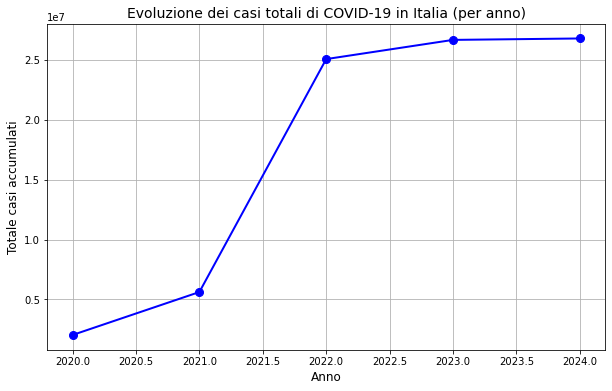

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Aggiungi una colonna 'year' per estrarre l'anno dalla data
df['year'] = df['date'].dt.year

# Filtra i dati per l'Italia
df_italy = df[df['location'] == 'Italy']

# Raggruppa per anno e somma i total cases
grouped_italy = df_italy.groupby('year').agg(
    total_cases=('total_cases', 'max')  # Utilizza max per ottenere il totale accumulato dei casi per anno
).reset_index()

# Visualizza il totale dei casi per anno
print(grouped_italy)

# Crea il grafico dell'evoluzione dei casi totali per anno
plt.figure(figsize=(10, 6))
plt.plot(grouped_italy['year'], grouped_italy['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (per anno)', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)
plt.grid(True)
plt.show()


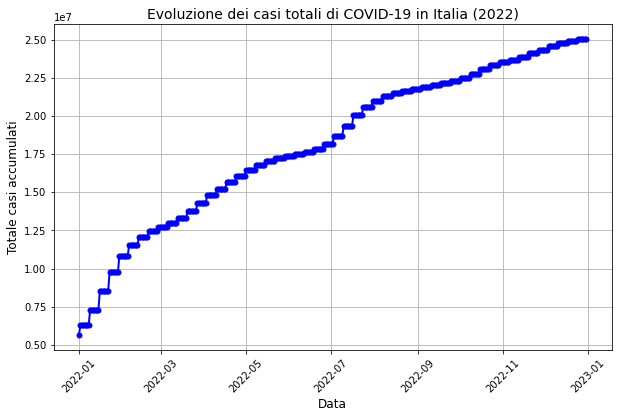

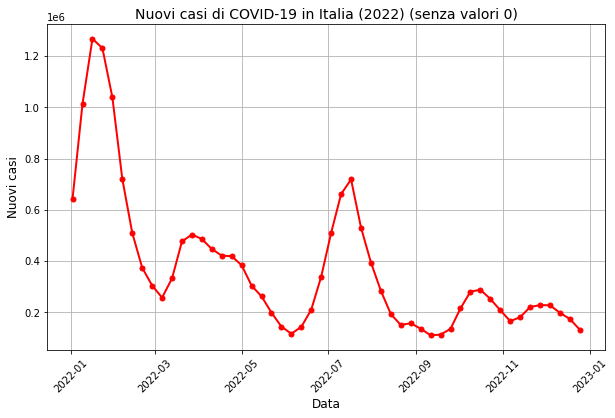

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per l'Italia e per il 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# 1. Grafico dell'evoluzione dei casi totali (total_cases) per l'anno 2022
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (2022)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Grafico del numero di nuovi casi (new_cases) per l'anno 2022, rimuovendo valori 0 e NaN
df_italy_2022_new_cases = df_italy_2022[(df_italy_2022['new_cases'] > 0) & (~df_italy_2022['new_cases'].isna())]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022_new_cases['date'], df_italy_2022_new_cases['new_cases'], marker='o', color='r', linestyle='-', linewidth=2, markersize=5)
plt.title('Nuovi casi di COVID-19 in Italia (2022) (senza valori 0)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi casi', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


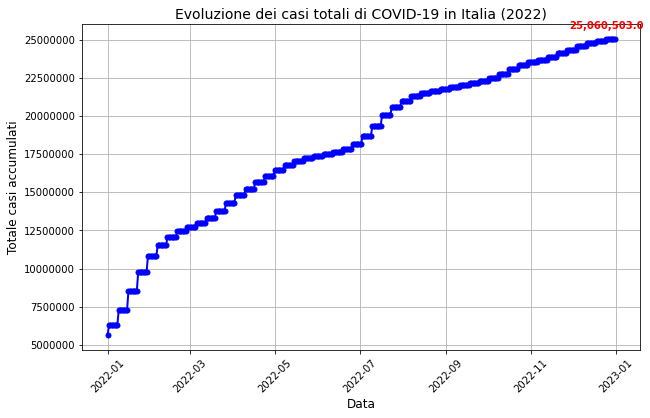

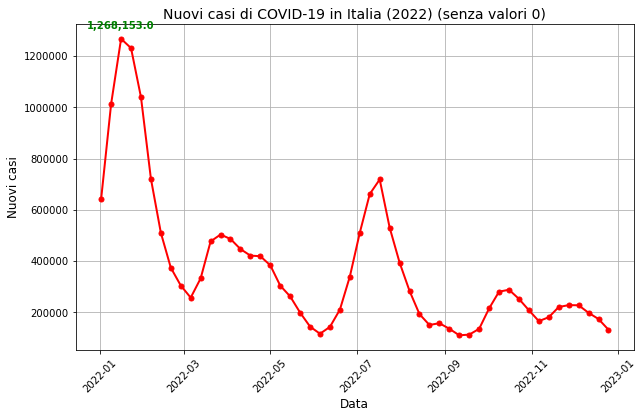

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset direttamente dal URL
df = pd.read_csv(url)

# Assicurati che la colonna 'date' sia nel formato corretto
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per l'Italia e per il 2022
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# 1. Grafico dell'evoluzione dei casi totali (total_cases) per l'anno 2022
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (2022)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale casi accumulati', fontsize=12)

# Annotiamo i punti di picco
max_cases = df_italy_2022['total_cases'].max()
max_case_date = df_italy_2022[df_italy_2022['total_cases'] == max_cases]['date'].iloc[0]
plt.annotate(f'{max_cases:,}', 
             (max_case_date, max_cases),
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center', 
             fontsize=10, 
             color='red', 
             weight='bold')

# Impediamo la notazione scientifica
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Grafico del numero di nuovi casi (new_cases) per l'anno 2022, rimuovendo valori 0 e NaN
df_italy_2022_new_cases = df_italy_2022[(df_italy_2022['new_cases'] > 0) & (~df_italy_2022['new_cases'].isna())]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022_new_cases['date'], df_italy_2022_new_cases['new_cases'], marker='o', color='r', linestyle='-', linewidth=2, markersize=5)
plt.title('Nuovi casi di COVID-19 in Italia (2022) (senza valori 0)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi casi', fontsize=12)

# Annotiamo i punti di picco
max_new_cases = df_italy_2022_new_cases['new_cases'].max()
max_new_case_date = df_italy_2022_new_cases[df_italy_2022_new_cases['new_cases'] == max_new_cases]['date'].iloc[0]
plt.annotate(f'{max_new_cases:,}', 
             (max_new_case_date, max_new_cases),
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center', 
             fontsize=10, 
             color='green', 
             weight='bold')

# Impediamo la notazione scientifica
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.xticks(rotation=45)
plt.show()


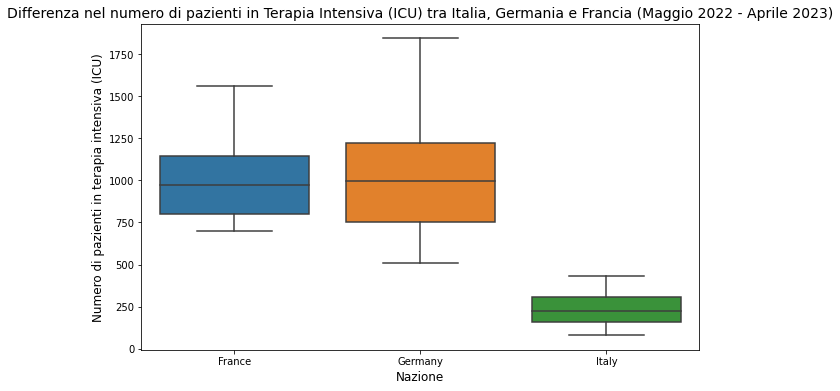

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania e Francia dal maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
df_filtered = df[(df['location'].isin(countries)) & 
                 (df['date'] >= '2022-05-01') & 
                 (df['date'] <= '2023-04-30')]

# Boxplot per il numero di pazienti in terapia intensiva (ICU) 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='location', y='icu_patients')

# Titoli e etichette
plt.title('Differenza nel numero di pazienti in Terapia Intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)', fontsize=14)
plt.xlabel('Nazione', fontsize=12)
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)', fontsize=12)

# Mostra il grafico
plt.show()


In [26]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Somma dei pazienti ospedalizzati (hosp_patients) per ogni paese
hospitalized_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Stampa della somma dei pazienti ospedalizzati per nazione
print("Somma dei pazienti ospedalizzati per nazione nel 2023:")
print(hospitalized_sum)

# Controlliamo quanti valori nulli ci sono e se è possibile gestirli
print(f"\nValori nulli nei pazienti ospedalizzati (hosp_patients):\n{null_values[['location', 'date', 'hosp_patients']]}")


Somma dei pazienti ospedalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Valori nulli nei pazienti ospedalizzati (hosp_patients):
       location       date  hosp_patients
131549   France 2023-04-01            NaN
131550   France 2023-04-02            NaN
131551   France 2023-04-03            NaN
131552   France 2023-04-04            NaN
131553   France 2023-04-05            NaN
...         ...        ...            ...
364038    Spain 2023-12-27            NaN
364039    Spain 2023-12-28            NaN
364040    Spain 2023-12-29            NaN
364041    Spain 2023-12-30            NaN
364042    Spain 2023-12-31            NaN

[843 rows x 3 columns]


In [27]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Visualizziamo il numero di valori nulli per ciascuna nazione
null_count = null_values['location'].value_counts()

# Stampa dei valori nulli per nazione e delle statistiche
print(f"Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:\n{null_count}")

# Mostriamo alcune righe con valori nulli per esaminare meglio la situazione
print("\nEsempio di righe con valori nulli per 'hosp_patients':")
print(null_values[['location', 'date', 'hosp_patients']].head())


Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:
Germany    365
France     275
Spain      203
Name: location, dtype: int64

Esempio di righe con valori nulli per 'hosp_patients':
       location       date  hosp_patients
131549   France 2023-04-01            NaN
131550   France 2023-04-02            NaN
131551   France 2023-04-03            NaN
131552   France 2023-04-04            NaN
131553   France 2023-04-05            NaN


In [28]:
import pandas as pd

# URL del file CSV
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Carichiamo il dataset
df = pd.read_csv(url)

# Assicuriamoci che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtriamo i dati per Italia, Germania, Francia e Spagna per il 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
df_filtered_2023 = df[(df['location'].isin(countries)) & (df['date'].dt.year == 2023)]

# Controlliamo i valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023[df_filtered_2023['hosp_patients'].isnull()]

# Visualizziamo il numero di valori nulli per ciascuna nazione
null_count = null_values['location'].value_counts()

# Numero totale di righe per ciascuna nazione
total_count = df_filtered_2023['location'].value_counts()

# Calcolare la percentuale di valori nulli rispetto al numero totale di righe
null_percentage = (null_count / total_count) * 100

# Stampa del numero di valori nulli e del numero totale di righe per nazione
print(f"Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:")
print(null_count)

print(f"\nNumero totale di righe per ciascuna nazione nel 2023:")
print(total_count)

# Calcolare la percentuale di dati nulli
print(f"\nPercentuale di valori nulli rispetto al totale delle righe per ciascuna nazione:")
print(null_percentage)

# Mostriamo alcune righe con valori nulli per esaminare meglio la situazione
print("\nEsempio di righe con valori nulli per 'hosp_patients':")
print(null_values[['location', 'date', 'hosp_patients']].head())


Numero di valori nulli nella colonna 'hosp_patients' per ciascuna nazione nel 2023:
Germany    365
France     275
Spain      203
Name: location, dtype: int64

Numero totale di righe per ciascuna nazione nel 2023:
Spain      365
Germany    365
France     365
Italy      365
Name: location, dtype: int64

Percentuale di valori nulli rispetto al totale delle righe per ciascuna nazione:
France      75.342466
Germany    100.000000
Italy             NaN
Spain       55.616438
Name: location, dtype: float64

Esempio di righe con valori nulli per 'hosp_patients':
       location       date  hosp_patients
131549   France 2023-04-01            NaN
131550   France 2023-04-02            NaN
131551   France 2023-04-03            NaN
131552   France 2023-04-04            NaN
131553   France 2023-04-05            NaN


In [1]:
# Importiamo le librerie necessarie 
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di casi per continente OWID
# Filtriamo solo i continenti OWID
owid_continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM']
df_owid = df[df['iso_code'].isin(owid_continents)]

# Raggruppiamo per continente e sommiamo i casi totali
continent_cases = df_owid.groupby('iso_code')['total_cases'].sum()

print("\nNumero totale di casi per continente OWID:")
print(continent_cases)

# 1b. Calcoliamo il numero totale di casi per i continenti OWID
total_owid_cases = continent_cases.sum()

# Calcoliamo la percentuale di casi per ogni continente rispetto al totale dei continenti OWID
percent_cases = (continent_cases / total_owid_cases) * 100

print("\nPercentuale di casi per continente rispetto al totale dei continenti OWID:")
print(percent_cases)


Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

In [2]:
# Importiamo le librerie necessarie 
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di casi per continente
# Filtriamo il dataset per i continenti di interesse (es. 'OWID_EUR' per Europa, 'OWID_AFR' per Africa, ecc.)
owid_continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM']

# Filtriamo il dataset per le righe che corrispondono ai continenti OWID
df_owid = df[df['iso_code'].isin(owid_continents)]

# Raggruppiamo i dati per continente (colonna 'iso_code') e sommiamo i casi totali
continent_cases = df_owid.groupby('iso_code')['total_cases'].sum()

print("\nNumero totale di casi per continente OWID:")
print(continent_cases)

# 1b. Calcoliamo il numero totale di casi per i continenti OWID
total_owid_cases = continent_cases.sum()

# Calcoliamo la percentuale di casi per ogni continente rispetto al totale dei continenti OWID
percent_cases = (continent_cases / total_owid_cases) * 100

print("\nPercentuale di casi per continente rispetto al totale dei continenti OWID:")
print(percent_cases)


Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

In [3]:
# Importiamo le librerie necessarie 
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di nuovi casi per continente
# Filtriamo il dataset per i continenti di interesse (es. 'OWID_EUR' per Europa, 'OWID_AFR' per Africa, ecc.)
owid_continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM']

# Filtriamo il dataset per le righe che corrispondono ai continenti OWID
df_owid = df[df['iso_code'].isin(owid_continents)]

# Raggruppiamo i dati per continente (colonna 'iso_code') e sommiamo i nuovi casi
continent_new_cases = df_owid.groupby('iso_code')['new_cases'].sum()

print("\nNumero totale di nuovi casi per continente OWID:")
print(continent_new_cases)

# 1b. Calcoliamo il numero totale di nuovi casi per i continenti OWID
total_owid_new_cases = continent_new_cases.sum()

# Calcoliamo la percentuale di nuovi casi per ogni continente rispetto al totale dei continenti OWID
percent_new_cases = (continent_new_cases / total_owid_new_cases) * 100

print("\nPercentuale di nuovi casi per continente rispetto al totale dei continenti OWID:")
print(percent_new_cases)


Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

In [4]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset per avere un'idea del contenuto
print("\nPrime righe del dataset:")
print(df.head())

# 1a. Calcoliamo il numero totale di nuovi casi per continente
# Filtriamo il dataset per righe valide nella colonna 'continent' (escludiamo valori nulli)
df_valid_continents = df[df['continent'].notnull()]

# Raggruppiamo i dati per continente (colonna 'continent') e sommiamo i nuovi casi
continent_new_cases = df_valid_continents.groupby('continent')['new_cases'].sum()

print("\nNumero totale di nuovi casi per continente:")
print(continent_new_cases)

# 1b. Calcoliamo il numero totale di nuovi casi per tutti i continenti
total_new_cases = continent_new_cases.sum()

# Calcoliamo la percentuale di nuovi casi per ogni continente rispetto al totale
percent_new_cases = (continent_new_cases / total_new_cases) * 100

print("\nPercentuale di nuovi casi per continente rispetto al totale dei continenti:")
print(percent_new_cases)


Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

<ipython-input-5-c77482620031>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy['date'] = pd.to_datetime(df_italy['date'])


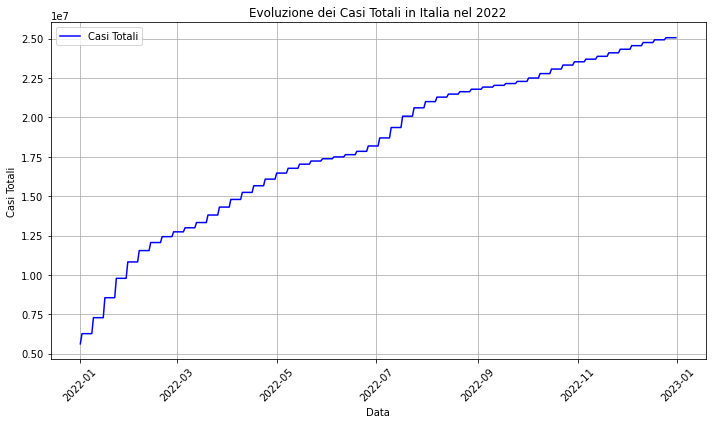

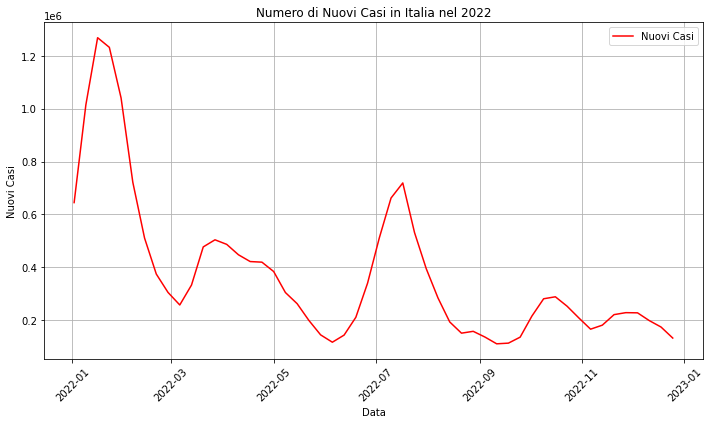

In [5]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per l'Italia (colonna 'location' uguale a 'Italy') e per l'anno 2022
df_italy = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Convertiamo la colonna 'date' in formato datetime
df_italy['date'] = pd.to_datetime(df_italy['date'])

# a. Evoluzione dei casi totali in Italia nel 2022
plt.figure(figsize=(10, 6))
plt.plot(df_italy['date'], df_italy['total_cases'], label='Casi Totali', color='blue')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# b. Numero di nuovi casi in Italia nel 2022 (escludendo valori pari a 0)
# Filtriamo i dati dove 'new_cases' è maggiore di 0
df_italy_new_cases = df_italy[df_italy['new_cases'] > 0]

# Creiamo un grafico per i nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(df_italy_new_cases['date'], df_italy_new_cases['new_cases'], label='Nuovi Casi', color='red')
plt.title('Numero di Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\claudio\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


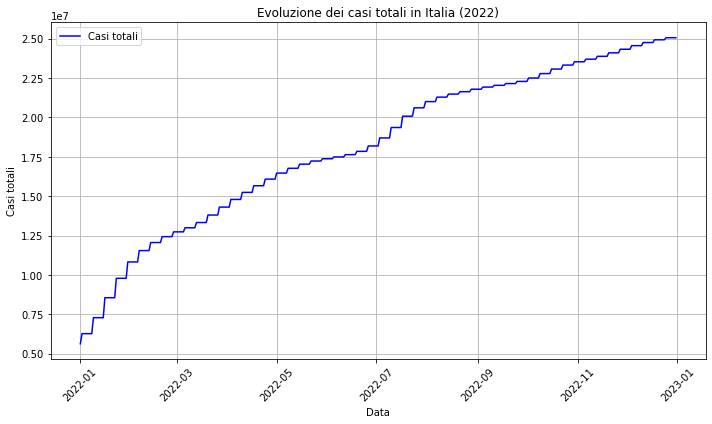

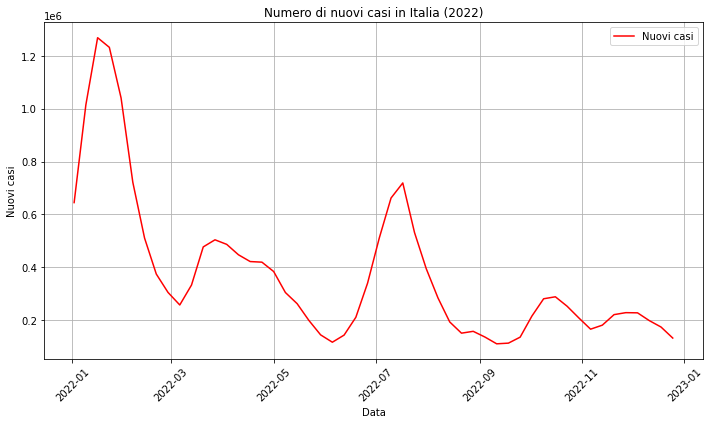

In [6]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per l'Italia (colonna 'location' uguale a 'Italy') e per l'anno 2022
df_italy = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Convertiamo la colonna 'date' in formato datetime usando .loc per evitare il warning
df_italy.loc[:, 'date'] = pd.to_datetime(df_italy['date'])

# a. L'evoluzione dei casi totali dall'inizio alla fine dell'anno
plt.figure(figsize=(10, 6))
plt.plot(df_italy['date'], df_italy['total_cases'], label='Casi totali', color='blue')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# b. Numero di nuovi casi rispetto alla data (filtriamo i nuovi casi 0)
df_italy_new_cases = df_italy[df_italy['new_cases'] > 0]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_new_cases['date'], df_italy_new_cases['new_cases'], label='Nuovi casi', color='red')
plt.title('Numero di nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\claudio\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


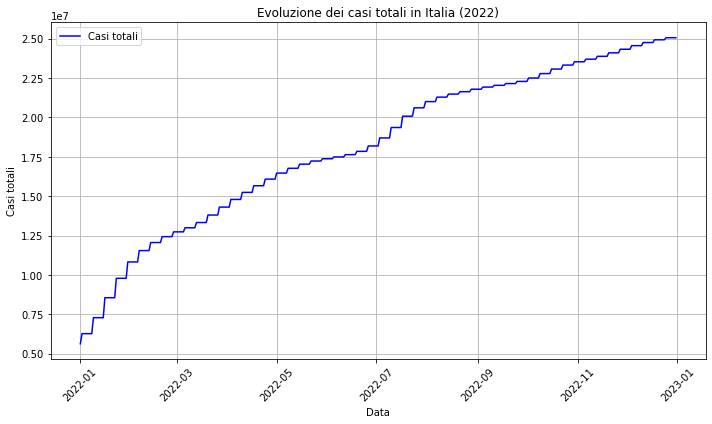

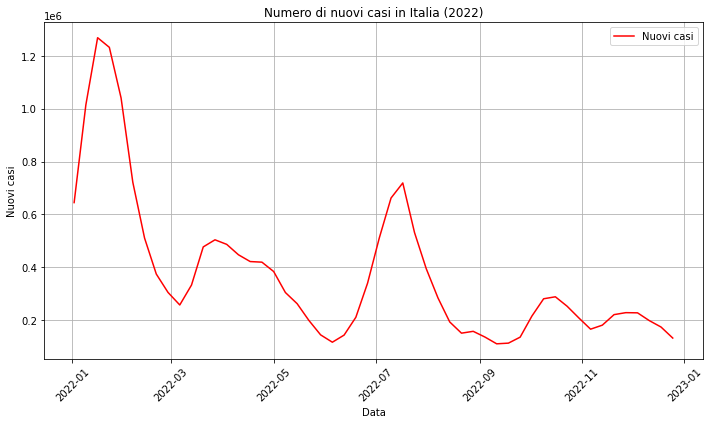

In [7]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per l'Italia (colonna 'location' uguale a 'Italy') e per l'anno 2022
df_italy = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Convertiamo la colonna 'date' in formato datetime usando .loc per evitare il warning
df_italy.loc[:, 'date'] = pd.to_datetime(df_italy['date'])

# a. L'evoluzione dei casi totali dall'inizio alla fine dell'anno
plt.figure(figsize=(10, 6))
plt.plot(df_italy['date'], df_italy['total_cases'], label='Casi totali', color='blue')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# b. Numero di nuovi casi rispetto alla data (filtriamo i nuovi casi 0)
df_italy_new_cases = df_italy[df_italy['new_cases'] > 0]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_new_cases['date'], df_italy_new_cases['new_cases'], label='Nuovi casi', color='red')
plt.title('Numero di nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


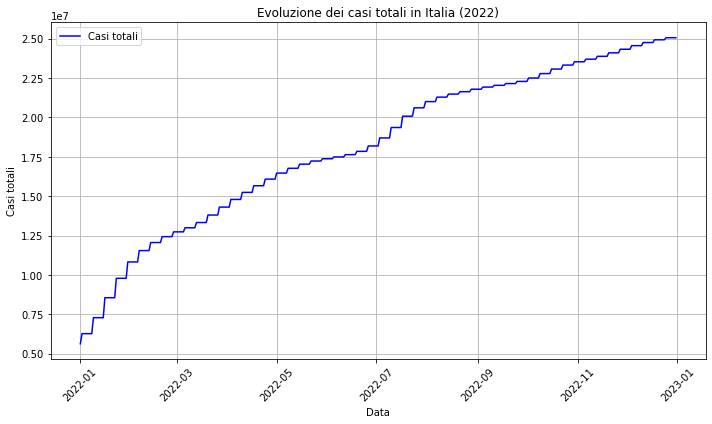

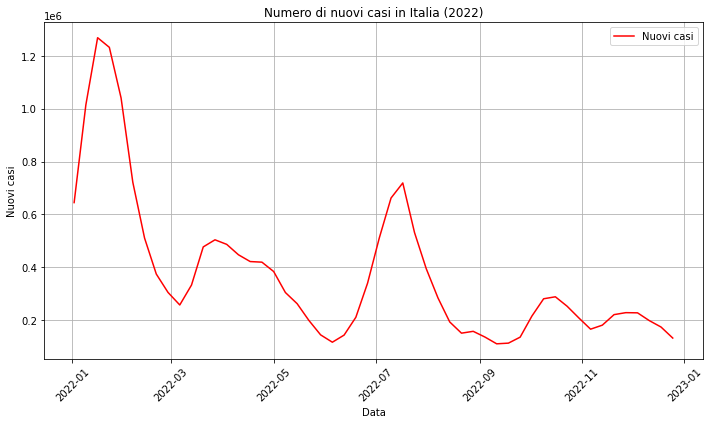

In [8]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per l'Italia (colonna 'location' uguale a 'Italy') e per l'anno 2022
df_italy = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Utilizziamo .loc per modificare direttamente la colonna 'date' senza il warning
df_italy = df_italy.copy()  # Creiamo una copia esplicita per evitare il warning
df_italy['date'] = pd.to_datetime(df_italy['date'])

# a. L'evoluzione dei casi totali dall'inizio alla fine dell'anno
plt.figure(figsize=(10, 6))
plt.plot(df_italy['date'], df_italy['total_cases'], label='Casi totali', color='blue')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# b. Numero di nuovi casi rispetto alla data (filtriamo i nuovi casi 0)
df_italy_new_cases = df_italy[df_italy['new_cases'] > 0]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_new_cases['date'], df_italy_new_cases['new_cases'], label='Nuovi casi', color='red')
plt.title('Numero di nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-9-b0c31fb4735f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


<Figure size 720x432 with 0 Axes>

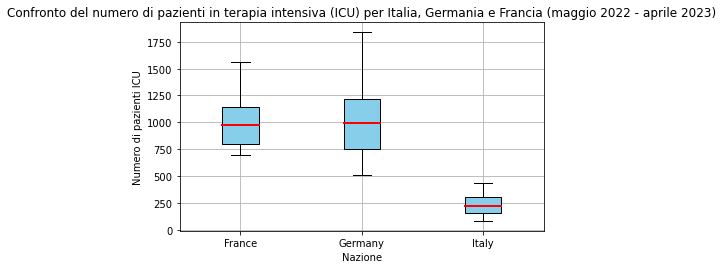

In [9]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania e Francia
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France'])]

# Convertiamo la colonna 'date' in formato datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Selezioniamo i dati dal 1 maggio 2022 al 30 aprile 2023
df_filtered = df_filtered[(df_filtered['date'] >= '2022-05-01') & (df_filtered['date'] <= '2023-04-30')]

# Creiamo un boxplot per confrontare il numero di pazienti ICU tra le tre nazioni
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='icu_patients', by='location', grid=True, patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'), 
                   whiskerprops=dict(color='black'),
                   medianprops=dict(color='red', linewidth=2))

plt.title('Confronto del numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.suptitle('')  # Rimuove il titolo predefinito
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti ICU')
plt.tight_layout()
plt.show()


C:\Users\claudio\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<Figure size 720x432 with 0 Axes>

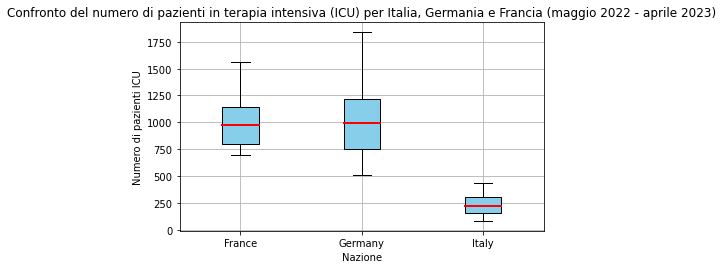

In [10]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania e Francia
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France'])]

# Convertiamo la colonna 'date' in formato datetime utilizzando .loc per evitare SettingWithCopyWarning
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

# Selezioniamo i dati dal 1 maggio 2022 al 30 aprile 2023
df_filtered = df_filtered[(df_filtered['date'] >= '2022-05-01') & (df_filtered['date'] <= '2023-04-30')]

# Creiamo un boxplot per confrontare il numero di pazienti ICU tra le tre nazioni
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='icu_patients', by='location', grid=True, patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'), 
                   whiskerprops=dict(color='black'),
                   medianprops=dict(color='red', linewidth=2))

plt.title('Confronto del numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.suptitle('')  # Rimuove il titolo predefinito
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti ICU')
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

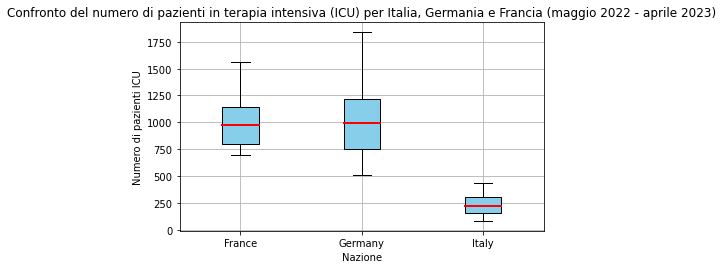

In [11]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania e Francia
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France'])].copy()  # Aggiungiamo .copy()

# Convertiamo la colonna 'date' in formato datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Selezioniamo i dati dal 1 maggio 2022 al 30 aprile 2023
df_filtered = df_filtered[(df_filtered['date'] >= '2022-05-01') & (df_filtered['date'] <= '2023-04-30')]

# Creiamo un boxplot per confrontare il numero di pazienti ICU tra le tre nazioni
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='icu_patients', by='location', grid=True, patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'), 
                   whiskerprops=dict(color='black'),
                   medianprops=dict(color='red', linewidth=2))

plt.title('Confronto del numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.suptitle('')  # Rimuove il titolo predefinito
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti ICU')
plt.tight_layout()
plt.show()


In [12]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania, Francia e Spagna nel 2023
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]

# Convertiamo la colonna 'date' in formato datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Filtriamo i dati per l'anno 2023
df_filtered_2023 = df_filtered[df_filtered['date'].dt.year == 2023]

# Sommiamo i pazienti ospitalizzati per ogni nazione
hosp_patients_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

print("\nSomma dei pazienti ospitalizzati per ciascuna nazione nel 2023:")
print(hosp_patients_sum)

# Verifica se ci sono valori nulli nella colonna 'hosp_patients'
null_values = df_filtered_2023['hosp_patients'].isnull().sum()

print(f"\nNumero di valori nulli nella colonna 'hosp_patients' nel 2023: {null_values}")

# Commento sulla gestione dei valori nulli
if null_values > 0:
    print("\nCi sono valori nulli nella colonna 'hosp_patients'.")
    print("Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,")
    print("oppure possiamo decidere di eliminarli se ritenuto necessario.")
else:
    print("\nNon ci sono valori nulli nella colonna 'hosp_patients'.")



Somma dei pazienti ospitalizzati per ciascuna nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Numero di valori nulli nella colonna 'hosp_patients' nel 2023: 843

Ci sono valori nulli nella colonna 'hosp_patients'.
Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,
oppure possiamo decidere di eliminarli se ritenuto necessario.


<ipython-input-12-1c610cb77a7b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [13]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania, Francia e Spagna nel 2023
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]

# Convertiamo la colonna 'date' in formato datetime usando .loc per evitare il warning
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

# Filtriamo i dati per l'anno 2023
df_filtered_2023 = df_filtered[df_filtered['date'].dt.year == 2023]

# Sommiamo i pazienti ospitalizzati per ogni nazione
hosp_patients_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Calcoliamo il numero di valori nulli per nazione nel 2023
null_values_count = df_filtered_2023.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())

# Calcoliamo il numero di righe per ciascuna nazione nel 2023
rows_count = df_filtered_2023.groupby('location').size()

# Creiamo un DataFrame con tutte le informazioni
summary_df = pd.DataFrame({
    'Total Hosp Patients': hosp_patients_sum,
    'Null Values Count': null_values_count,
    'Rows Count': rows_count
})

# Mostriamo il risultato
print("\nTabella con i dati aggregati per ciascuna nazione nel 2023:")
print(summary_df)

# Commento sulla gestione dei valori nulli
if null_values_count.sum() > 0:
    print("\nCi sono valori nulli nella colonna 'hosp_patients'.")
    print("Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,")
    print("oppure possiamo decidere di eliminarli se ritenuto necessario.")
else:
    print("\nNon ci sono valori nulli nella colonna 'hosp_patients'.")



Tabella con i dati aggregati per ciascuna nazione nel 2023:
          Total Hosp Patients  Null Values Count  Rows Count
location                                                    
France              1382574.0                275         365
Germany                   0.0                365         365
Italy               1175272.0                  0         365
Spain                354602.0                203         365

Ci sono valori nulli nella colonna 'hosp_patients'.
Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,
oppure possiamo decidere di eliminarli se ritenuto necessario.


C:\Users\claudio\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania, Francia e Spagna nel 2023
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]

# Convertiamo la colonna 'date' in formato datetime con .loc per evitare il warning
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

# Filtriamo i dati per l'anno 2023
df_filtered_2023 = df_filtered[df_filtered['date'].dt.year == 2023]

# Sommiamo i pazienti ospitalizzati per ogni nazione
hosp_patients_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Calcoliamo il numero di valori nulli per nazione nel 2023
null_values_count = df_filtered_2023.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())

# Calcoliamo il numero di righe per ciascuna nazione nel 2023
rows_count = df_filtered_2023.groupby('location').size()

# Creiamo un DataFrame con tutte le informazioni
summary_df = pd.DataFrame({
    'Total Hosp Patients': hosp_patients_sum,
    'Null Values Count': null_values_count,
    'Rows Count': rows_count
})

# Mostriamo il risultato
print("\nTabella con i dati aggregati per ciascuna nazione nel 2023:")
print(summary_df)

# Commento sulla gestione dei valori nulli
if null_values_count.sum() > 0:
    print("\nCi sono valori nulli nella colonna 'hosp_patients'.")
    print("Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,")
    print("oppure possiamo decidere di eliminarli se ritenuto necessario.")
else:
    print("\nNon ci sono valori nulli nella colonna 'hosp_patients'.")



Tabella con i dati aggregati per ciascuna nazione nel 2023:
          Total Hosp Patients  Null Values Count  Rows Count
location                                                    
France              1382574.0                275         365
Germany                   0.0                365         365
Italy               1175272.0                  0         365
Spain                354602.0                203         365

Ci sono valori nulli nella colonna 'hosp_patients'.
Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,
oppure possiamo decidere di eliminarli se ritenuto necessario.


C:\Users\claudio\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [15]:
# Importiamo le librerie necessarie
import pandas as pd

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  # Sostituisci con il percorso del file CSV
df = pd.read_csv(file_path)

# Filtriamo i dati per Italia, Germania, Francia e Spagna nel 2023
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])].copy()  # Aggiungiamo .copy()

# Convertiamo la colonna 'date' in formato datetime con .loc per evitare il warning
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

# Filtriamo i dati per l'anno 2023
df_filtered_2023 = df_filtered[df_filtered['date'].dt.year == 2023]

# Sommiamo i pazienti ospitalizzati per ogni nazione
hosp_patients_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Calcoliamo il numero di valori nulli per nazione nel 2023
null_values_count = df_filtered_2023.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())

# Calcoliamo il numero di righe per ciascuna nazione nel 2023
rows_count = df_filtered_2023.groupby('location').size()

# Creiamo un DataFrame con tutte le informazioni
summary_df = pd.DataFrame({
    'Total Hosp Patients': hosp_patients_sum,
    'Null Values Count': null_values_count,
    'Rows Count': rows_count
})

# Mostriamo il risultato
print("\nTabella con i dati aggregati per ciascuna nazione nel 2023:")
print(summary_df)

# Commento sulla gestione dei valori nulli
if null_values_count.sum() > 0:
    print("\nCi sono valori nulli nella colonna 'hosp_patients'.")
    print("Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,")
    print("oppure possiamo decidere di eliminarli se ritenuto necessario.")
else:
    print("\nNon ci sono valori nulli nella colonna 'hosp_patients'.")



Tabella con i dati aggregati per ciascuna nazione nel 2023:
          Total Hosp Patients  Null Values Count  Rows Count
location                                                    
France              1382574.0                275         365
Germany                   0.0                365         365
Italy               1175272.0                  0         365
Spain                354602.0                203         365

Ci sono valori nulli nella colonna 'hosp_patients'.
Se i valori nulli sono pochi, possiamo sostituirli con la media o la mediana dei dati,
oppure possiamo decidere di eliminarli se ritenuto necessario.
